In [7]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

import glob
import pandas as pd
import glob
import shutil

<IPython.core.display.Javascript object>

`%matplotlib` prevents importing * from pylab and numpy


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-area-stats
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-area-stats
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


U:\20160219 heldere verlichting grote phiset\expand\20160219T130351 nan cannot convert index to integer
U:\20160219 heldere verlichting grote phiset\expand\20160219T130351 nan 'lastexpand:20160219T130351'
U:\20160219 heldere verlichting grote phiset\expand\20160220T154031 2 'lastexpand:20160220T154031'


C:\Python27\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


\includegraphics{notebooks/biax-area-stats/area.pdf}


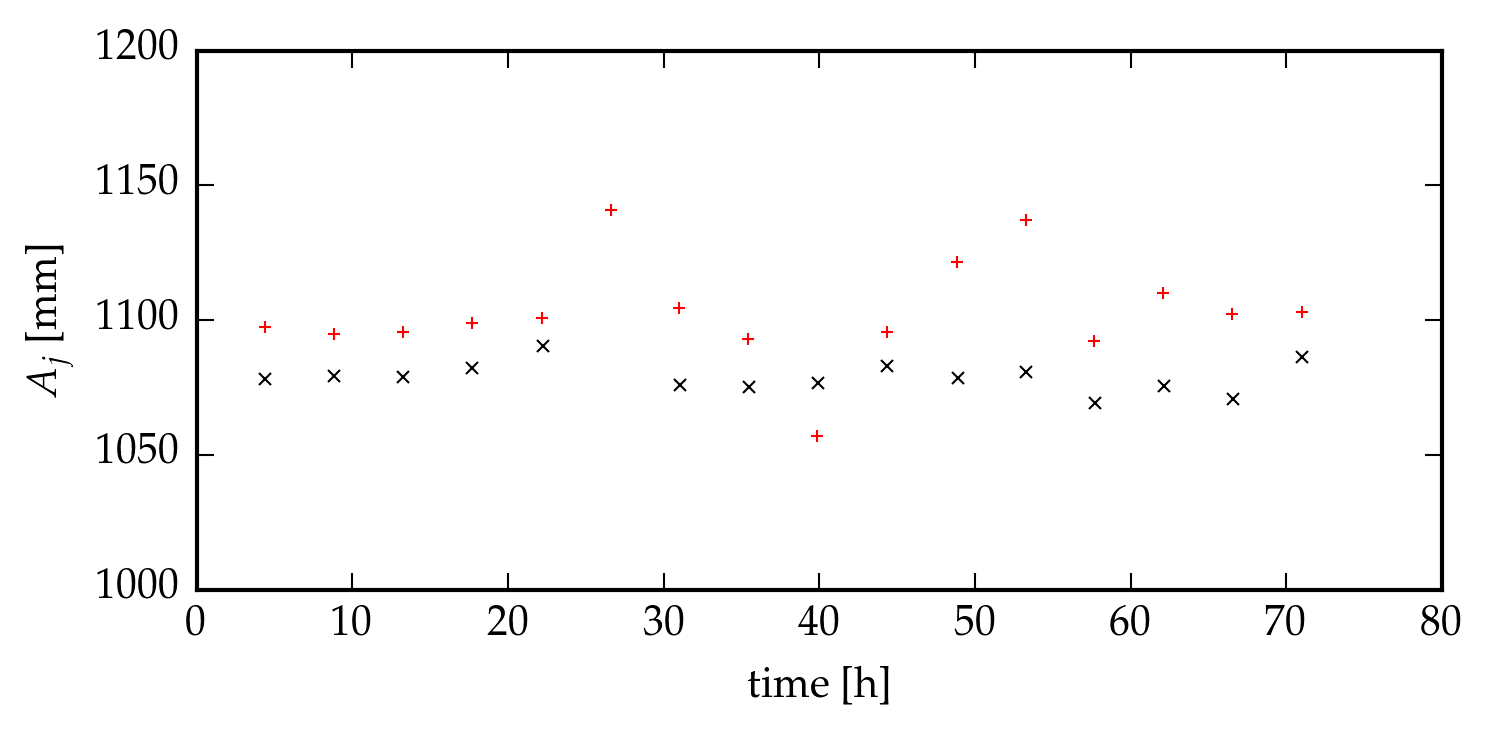

In [45]:
B0 = 916000
CD0 = 1144000

mm_per_tick = 4.95e-5
px_per_tick = 0.0008251

paths = sorted(glob.glob(r"U:\20160219 heldere verlichting grote phiset\expand\*"))

values = [
    np.nan,
    3,9,15,21,46,2,5,10,12,26,53,3,5,13,18,32
]

ijdata = pd.read_csv(r"U:\20160219 heldere verlichting grote phiset\lastexpand\Results.txt", sep='\t', index_col='Label').to_dict()['Area']


fullfig()

start = None
for p,v in zip(paths, values):
    name = os.path.split(p)[1]
    time = datetime.datetime.strptime(name, "%Y%m%dT%H%M%S")
    if start is None:
        start = datetime.datetime.strptime(name, "%Y%m%dT%H%M%S")
    dt = (time - start).total_seconds()
    
    states = np.loadtxt(p + "/position.csv")
    try:
        t, _, Bticks, CDticks = states[v]
        lB = B0 + Bticks
        lCD = CD0 + CDticks

        A = (lB * lCD) * (mm_per_tick**2)
        plt.plot( (dt + t) / 3600, A, "r+", ms=3)
    except IndexError as e:
        print p,v,e
    

    t, _, Bticks, CDticks = states[-1]
    lB = B0 + Bticks
    lCD = CD0 + CDticks

    try:
        free_area_ticks = ijdata['lastexpand:' + name] / (px_per_tick**2)
        A = ((lB * lCD) - free_area_ticks) * (mm_per_tick**2)
        plt.plot( (dt + t) / 3600, A, "kx", ms=3)
    except KeyError as e:
        print p,v,e
        
plt.axis(ymin=1000, ymax=1200, xmin=0)
plt.xlabel("time [h]")
plt.ylabel("$A_j$ [mm]")

plt.legend(loc='upper right', fontsize='small', frameon=False, )

plt.savefig('area.pdf')
    
    #shutil.copy(lastfig, r"U:\20160219 heldere verlichting grote phiset\lastexpand\%s.png" % name)